<a href="https://colab.research.google.com/github/7PAM2015-0509-2023TEAM1/Kaggle-Challenge/blob/main/Kaggle_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 6.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import shap
from shap.maskers import Independent
from shap import Explainer, TreeExplainer, Explanation

##Data Reading and Preprocessing



In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/7PAM2015-0509-2023TEAM1/Kaggle-Challenge/main/train.csv")


In [7]:
df_test = pd.read_csv("https://raw.githubusercontent.com/7PAM2015-0509-2023TEAM1/Kaggle-Challenge/main/test.csv")

In [8]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [9]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [10]:
df.shape

(8693, 14)

In [11]:
# checking null values
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [12]:
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [13]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [14]:
#seperate the categorical data from the numerical dataset
cat_col=df.select_dtypes(include=['object']).columns
df_train_cat=df[cat_col]
print(df_train_cat.head())

  PassengerId HomePlanet CryoSleep  Cabin  Destination    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  False   

                Name  
0    Maham Ofracculy  
1       Juanna Vines  
2      Altark Susent  
3       Solam Susent  
4  Willy Santantines  


In [15]:
for columns in df_train_cat.columns:
    df_train_cat[columns].fillna(df_train_cat[columns].mode()[0],inplace=True)

<ipython-input-15-fc5f93766abc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_cat[columns].fillna(df_train_cat[columns].mode()[0],inplace=True)


In [16]:
df_train_cat.isnull().sum()

PassengerId    0
HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
VIP            0
Name           0
dtype: int64

In [17]:
# start check the columns which contains the numerical values
num_col=df.select_dtypes(include=['float64']).columns
df_train_num = df[num_col]
print(df_train_num.head())

    Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
0  39.0          0.0        0.0           0.0     0.0     0.0
1  24.0        109.0        9.0          25.0   549.0    44.0
2  58.0         43.0     3576.0           0.0  6715.0    49.0
3  33.0          0.0     1283.0         371.0  3329.0   193.0
4  16.0        303.0       70.0         151.0   565.0     2.0


In [18]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_train_imputed = pd.DataFrame(imputer.fit_transform(df_train_num),columns=df_train_num.columns)

In [19]:
df_train_imputed.isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [20]:
df_train = pd.concat([df_train_cat,df_train_imputed,df['Transported']],axis=1)

In [21]:
print(df_train.head())

  PassengerId HomePlanet  CryoSleep  Cabin  Destination    VIP  \
0     0001_01     Europa      False  B/0/P  TRAPPIST-1e  False   
1     0002_01      Earth      False  F/0/S  TRAPPIST-1e  False   
2     0003_01     Europa      False  A/0/S  TRAPPIST-1e   True   
3     0003_02     Europa      False  A/0/S  TRAPPIST-1e  False   
4     0004_01      Earth      False  F/1/S  TRAPPIST-1e  False   

                Name   Age  RoomService  FoodCourt  ShoppingMall     Spa  \
0    Maham Ofracculy  39.0          0.0        0.0           0.0     0.0   
1       Juanna Vines  24.0        109.0        9.0          25.0   549.0   
2      Altark Susent  58.0         43.0     3576.0           0.0  6715.0   
3       Solam Susent  33.0          0.0     1283.0         371.0  3329.0   
4  Willy Santantines  16.0        303.0       70.0         151.0   565.0   

   VRDeck  Transported  
0     0.0        False  
1    44.0         True  
2    49.0        False  
3   193.0        False  
4     2.0         Tru

In [22]:
print(df_train.shape)

(8693, 14)


In [23]:
df_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
VIP                bool
Name             object
Age             float64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [24]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Transported'],
      dtype='object')

In [25]:
df_test.shape

(4277, 13)

In [26]:
# do the same tranformation with test data set
cat_col_test=df_test.select_dtypes(include=['object']).columns
df_train_cat_test=df_test[cat_col_test]
print(df_train_cat_test.head())

for columns in df_train_cat_test.columns:
    df_train_cat_test[columns].fillna(df_train_cat_test[columns].mode()[0],inplace=True)

df_train_cat_test.isnull().sum()

  PassengerId HomePlanet CryoSleep  Cabin  Destination    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  False   

               Name  
0   Nelly Carsoning  
1    Lerome Peckers  
2   Sabih Unhearfus  
3  Meratz Caltilter  
4   Brence Harperez  


<ipython-input-26-fe664c77eebb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_cat_test[columns].fillna(df_train_cat_test[columns].mode()[0],inplace=True)


PassengerId    0
HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
VIP            0
Name           0
dtype: int64

In [27]:

# start check the columns which contains the numerical values
num_col_test=df_test.select_dtypes(include=['float64']).columns
df_train_num_test = df_test[num_col_test]
print(df_train_num_test.head())

imputer_test = KNNImputer(n_neighbors=5)
df_train_imputed_test = pd.DataFrame(imputer.fit_transform(df_train_num_test),columns=df_train_num_test.columns)

df_train_imputed_test.isnull().sum()

    Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
0  27.0          0.0        0.0           0.0     0.0     0.0
1  19.0          0.0        9.0           0.0  2823.0     0.0
2  31.0          0.0        0.0           0.0     0.0     0.0
3  38.0          0.0     6652.0           0.0   181.0   585.0
4  20.0         10.0        0.0         635.0     0.0     0.0


Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [28]:
df_test_transform = pd.concat([df_train_cat_test,df_train_imputed_test],axis=1)
print(df_test_transform.shape)

(4277, 13)


In [29]:
df_test_transform.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
VIP             0
Name            0
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [30]:
# dropping columns since the PassengerId, Name and Cabin won't be effective in prediction
# as these are just ids
df_new = df_train.drop(columns=['PassengerId', 'Name', 'Cabin'])

In [31]:
df_new.shape

(8693, 11)

In [32]:
#drop the same rows from test set as well
df_test_transform = df_test_transform.drop(columns=['PassengerId', 'Name', 'Cabin'])

In [33]:
df_test_transform.shape

(4277, 10)

#**Data Visualization**

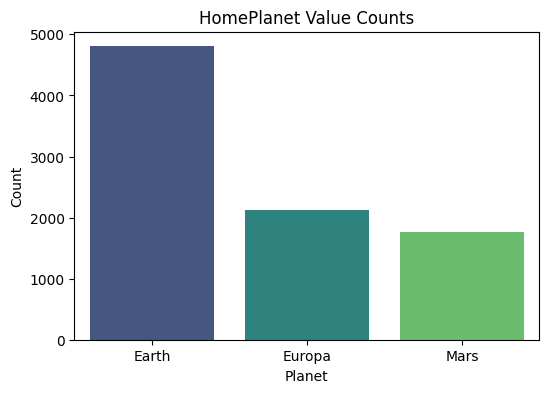

In [35]:
# Count the frequency of each value
count_data = df_new['HomePlanet'].value_counts().reset_index()
count_data.columns = ['HomePlanet', 'Count']

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x='HomePlanet', y='Count', data=count_data, palette='viridis', hue='HomePlanet')

# Add labels and title
plt.xlabel('Planet')
plt.ylabel('Count')
plt.title('HomePlanet Value Counts')

# Show the plot
plt.show()

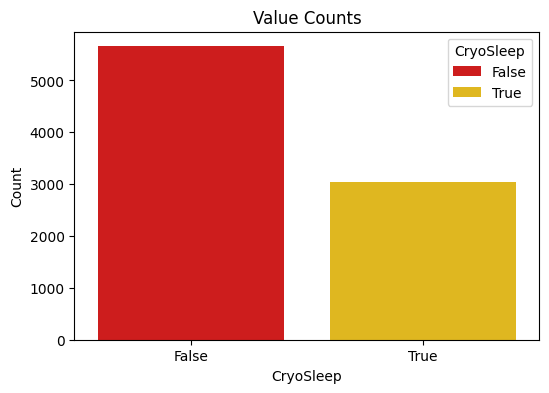

In [36]:
# Count the frequency of each value
count_data = df_new['CryoSleep'].value_counts().reset_index()
count_data.columns = ['CryoSleep', 'Count']

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x='CryoSleep', y='Count', data=count_data, palette='hot', hue='CryoSleep')

# Add labels and title
plt.ylabel('Count')
plt.title('Value Counts')

# Show the plot
plt.show()

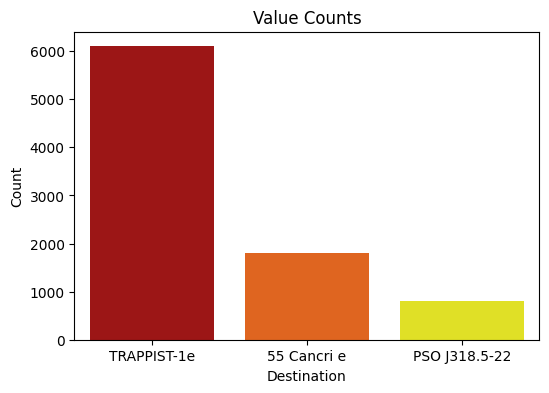

In [37]:
# Count the frequency of each value
count_data = df_new['Destination'].value_counts().reset_index()
count_data.columns = ['Destination', 'Count']

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x='Destination', y='Count', data=count_data, palette='hot', hue='Destination')

# Add labels and title
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Value Counts')

# Show the plot
plt.show()

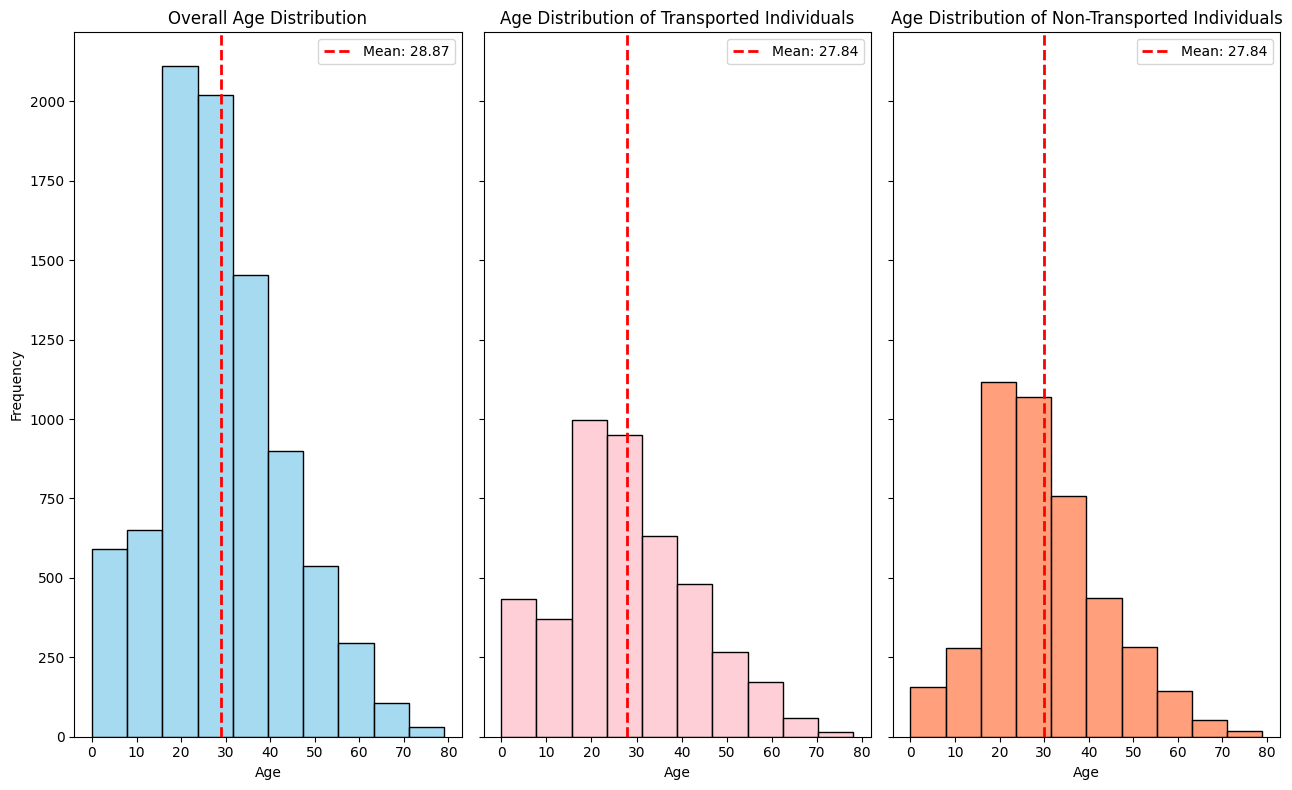

In [38]:
# Filter the DataFrame for rows where 'Transported' is True
df_transported = df_new[df_new['Transported'] == True]
df_non_transported = df_new[df_new['Transported'] == False]

# Calculate the mean of the 'age' column
mean_age = df_new['Age'].mean()

# Calculate the mean of the 'age' column for transported individuals
mean_age_transported = df_transported['Age'].mean()
mean_age_non_transported = df_non_transported['Age'].mean()

# Create side-by-side plots
# fig, axes = plt.subplots(1, 2, figsize=(13, 8), sharey=True)
fig, axes = plt.subplots(1, 3, figsize=(13, 8), sharey=True)

# Overall age distribution
sns.histplot(df_new['Age'], bins=10, kde=False, color='skyblue', ax=axes[0])
axes[0].axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_age:.2f}')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Overall Age Distribution')
axes[0].legend()

# Age distribution of transported individuals
sns.histplot(df_transported['Age'], bins=10, kde=False, color='pink', ax=axes[1])
axes[1].axvline(mean_age_transported, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_age_transported:.2f}')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Age Distribution of Transported Individuals')
axes[1].legend()

# Age distribution of transported individuals
sns.histplot(df_non_transported['Age'], bins=10, kde=False, color='coral', ax=axes[2])
axes[2].axvline(mean_age_non_transported, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_age_transported:.2f}')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Age Distribution of Non-Transported Individuals')
axes[2].legend()

# Show the plots
plt.tight_layout()
plt.show()

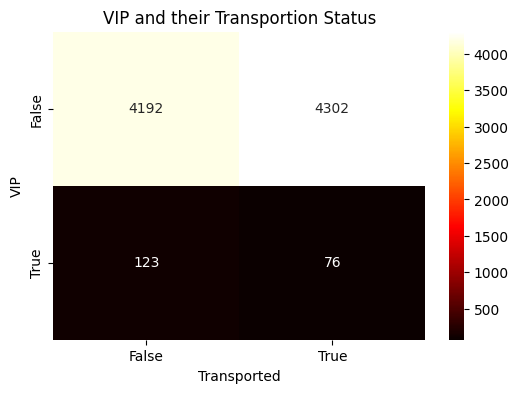

In [39]:
# Create a confusion matrix-like DataFrame
conf_matrix = pd.crosstab(df_new['VIP'], df_new['Transported'], rownames=['VIP'], colnames=['Transported'])

# Plot the confusion matrix-style DataFrame using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='hot')

# Add labels and title
plt.xlabel('Transported')
plt.ylabel('VIP')
plt.title('VIP and their Transportion Status')

# Show the plot
plt.show()

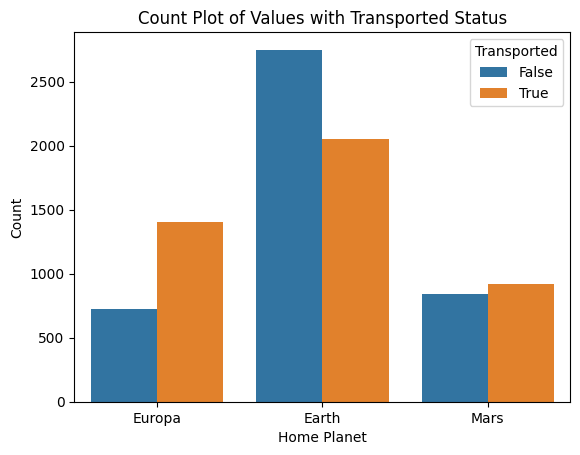

In [40]:
sns.countplot(data=df_new, x='HomePlanet', hue='Transported')

plt.xlabel('Home Planet')
plt.ylabel('Count')
plt.title('Count Plot of Values with Transported Status')

# Show the plot
plt.show()

In [42]:
df_new.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
VIP             0
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

**#Data Encoding**